# PROJECT : Predicting Heart Disease

The Data Scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [163]:
df = pd.read_csv('dataset.csv')

In [164]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [165]:
df.shape

(303, 14)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [167]:
df.duplicated().sum()

1

In [168]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [169]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [170]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [171]:
num_cols = df.select_dtypes(include=['float','int']).columns.to_list()
obj_cols = df.select_dtypes(include=['float','int']).columns.to_list()

In [172]:
num_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

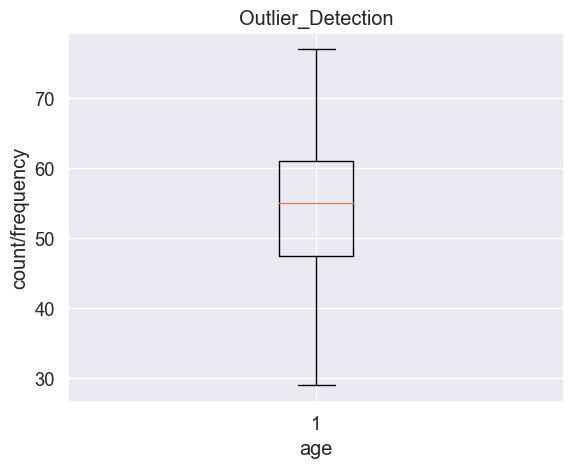

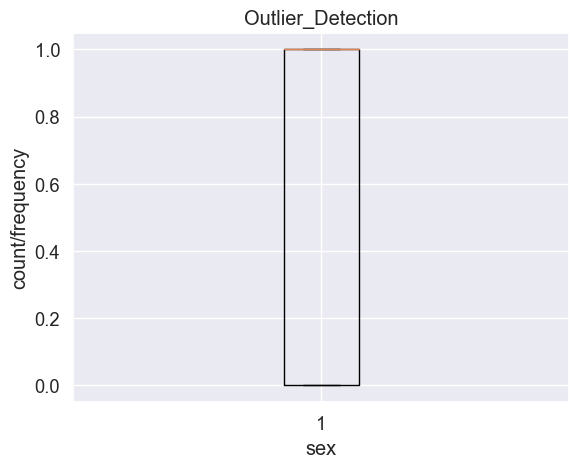

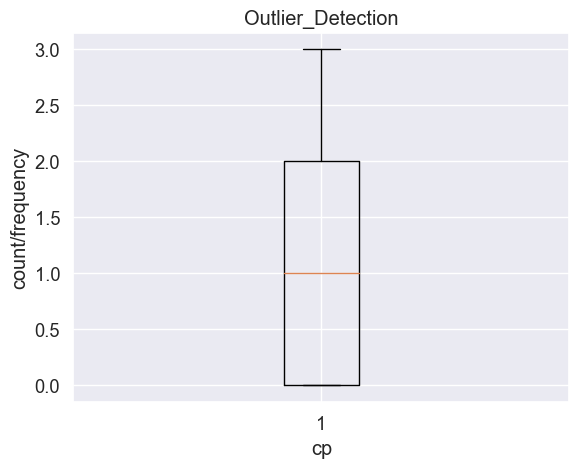

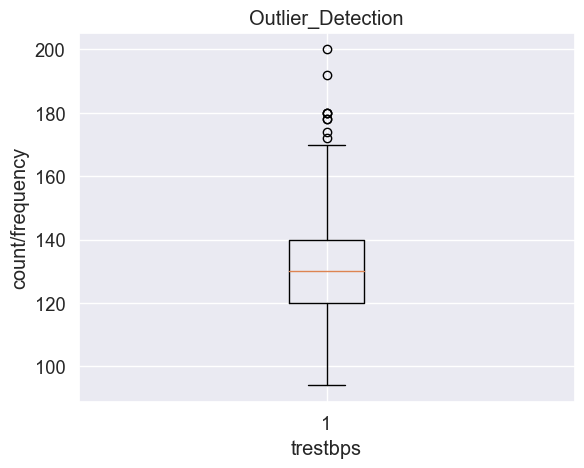

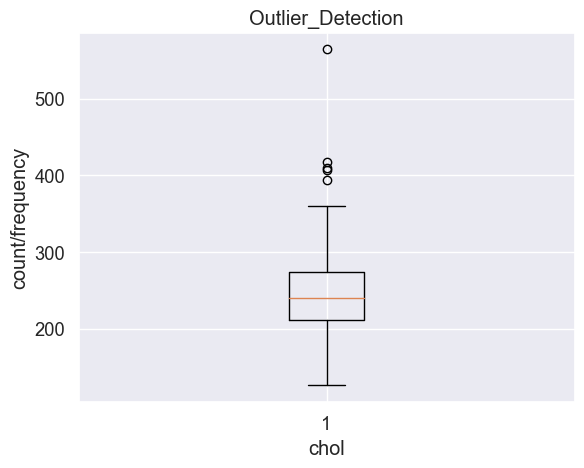

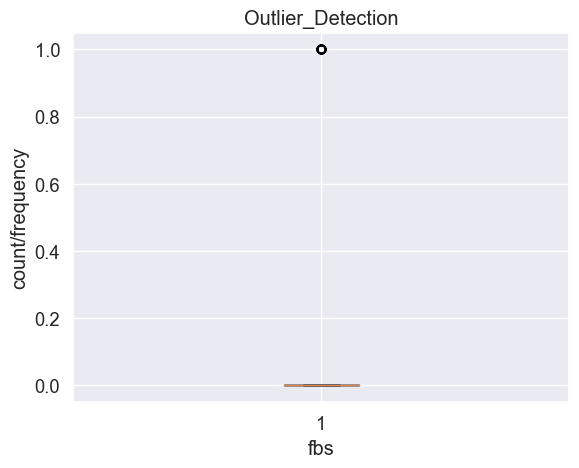

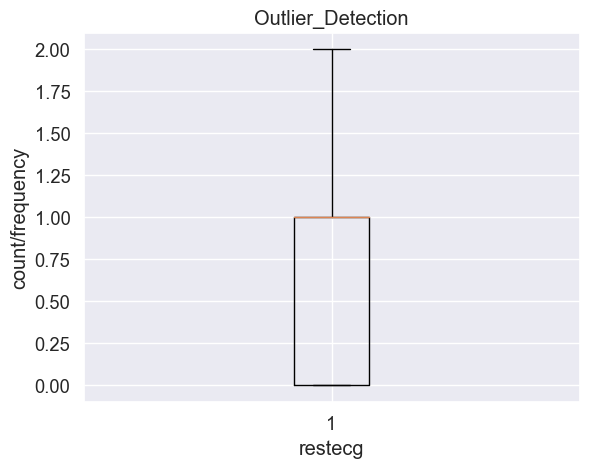

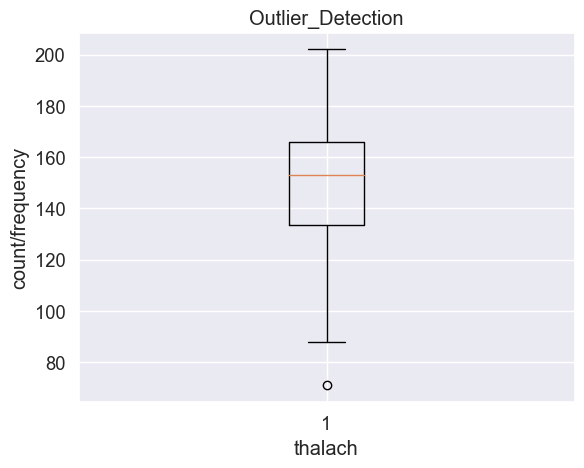

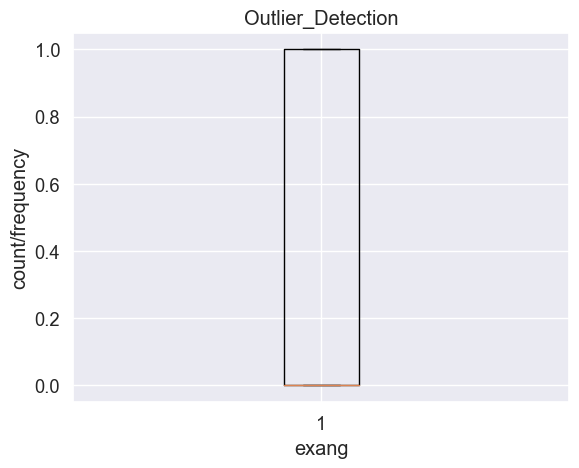

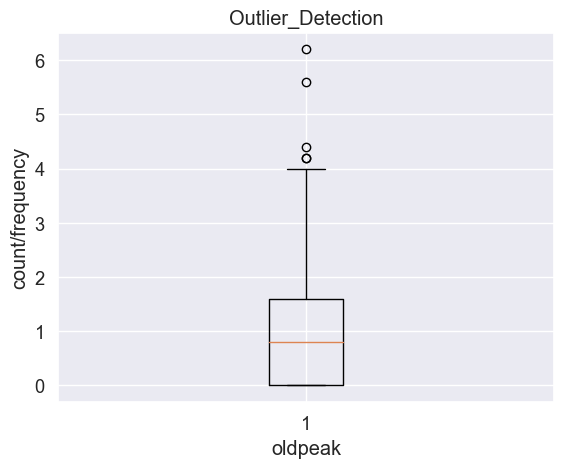

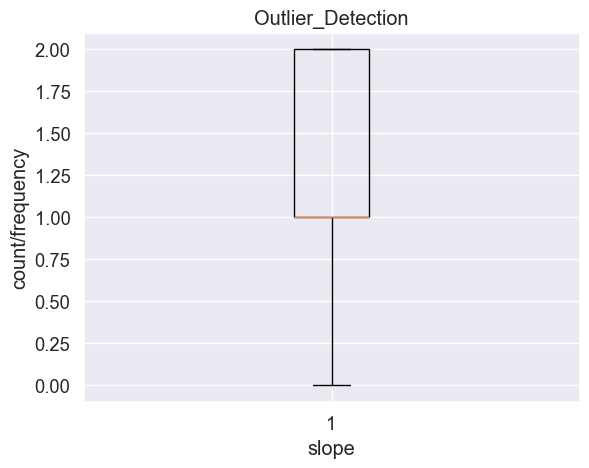

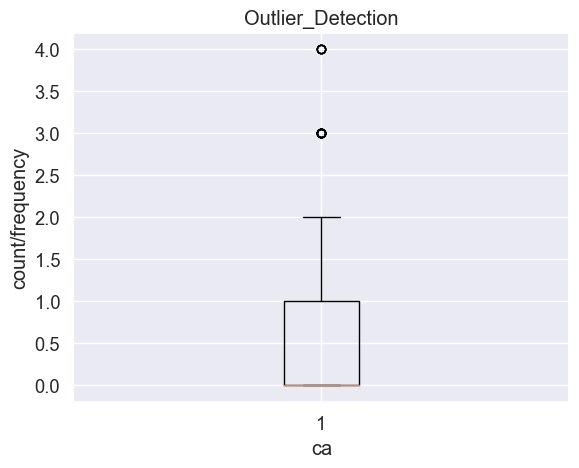

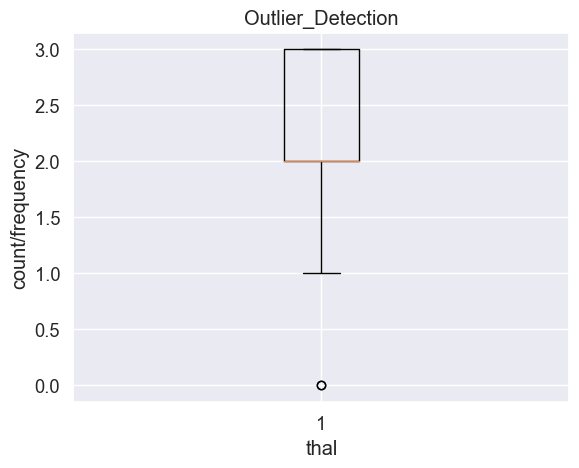

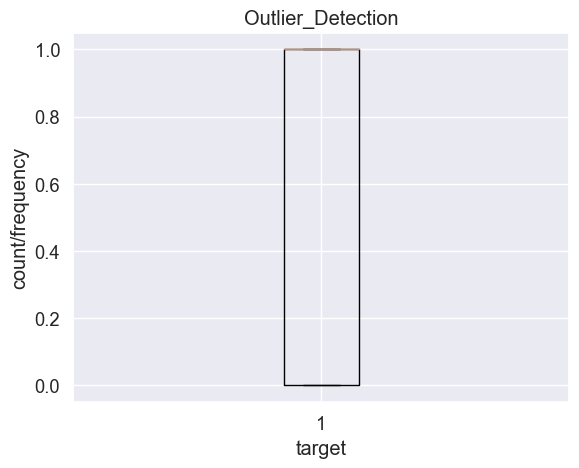

In [173]:
for i in num_cols:
    plt.boxplot(df[i])
    plt.title('Outlier_Detection')
    plt.xlabel(i)
    plt.ylabel('count/frequency')
    plt.show()

In [174]:
out_col = ['trestbps','chol' ,'thalach', 'oldpeak' ,'ca','thal']

In [175]:
for i in out_col:
    if df[i].dtypes != 'object':
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        
        upper = Q3 + 1.5*IQR
        lower = Q1 - 1.5*IQR
        df = df[(df[i] >= lower) & (df[i] <= upper)]

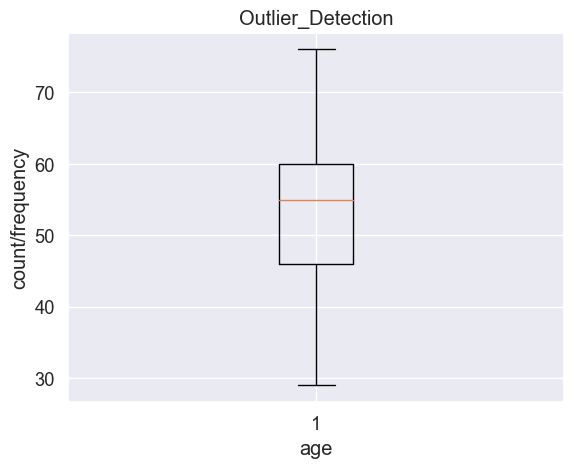

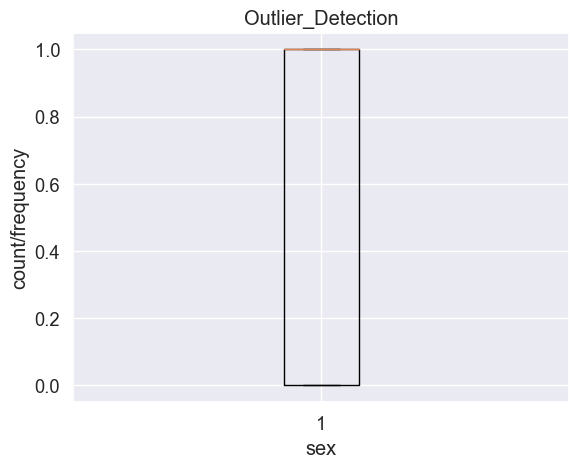

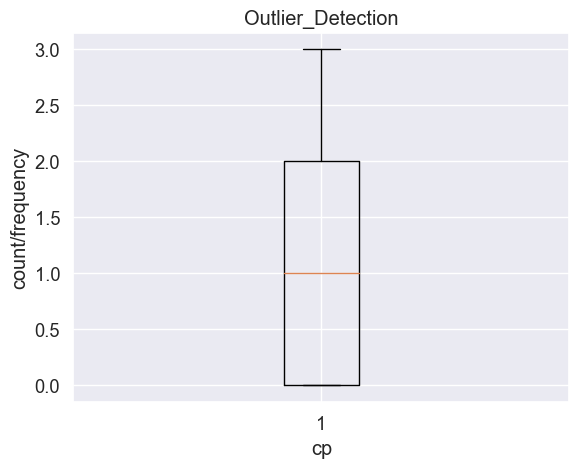

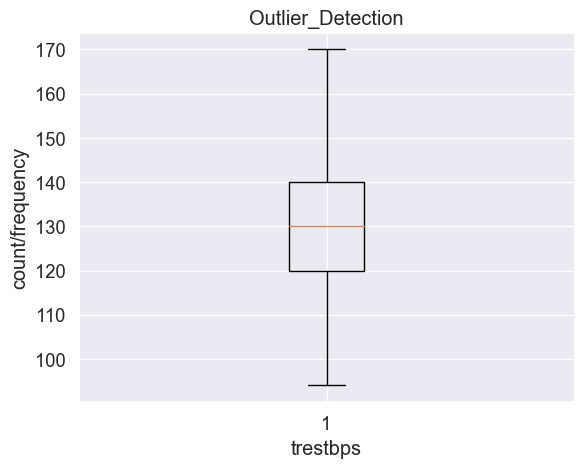

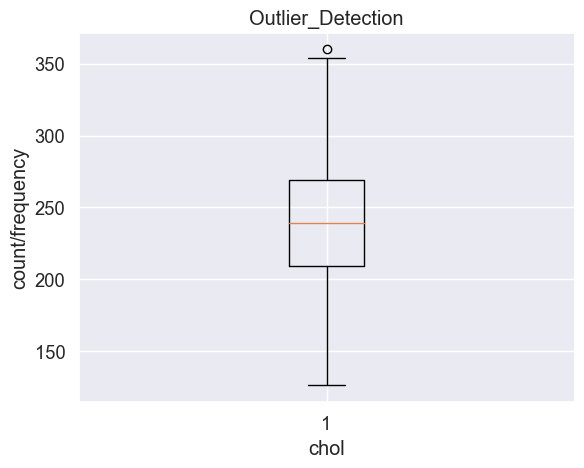

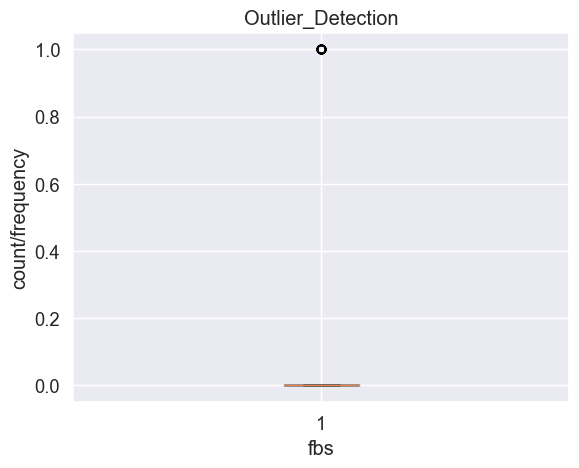

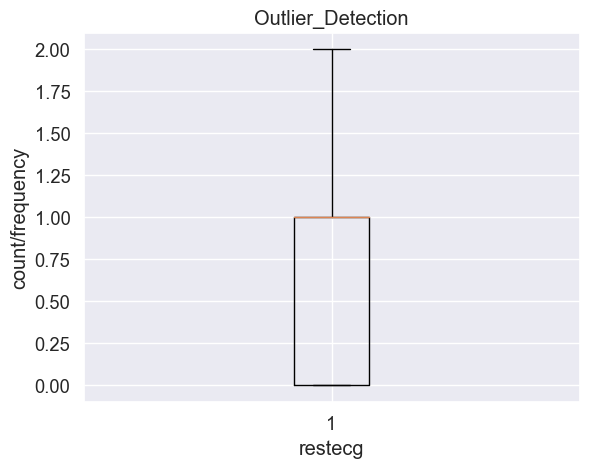

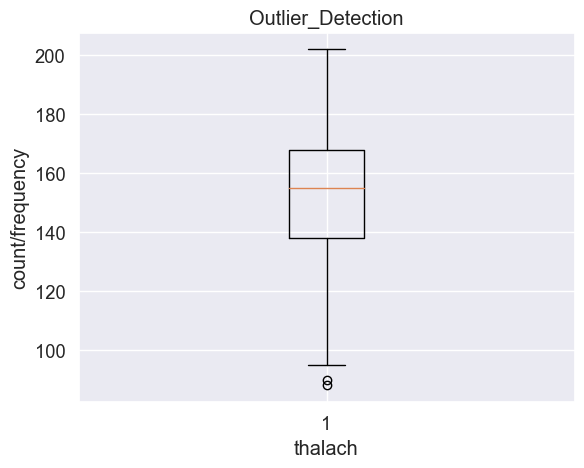

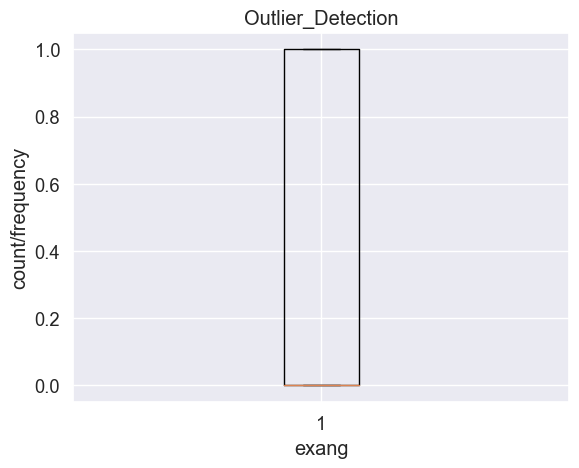

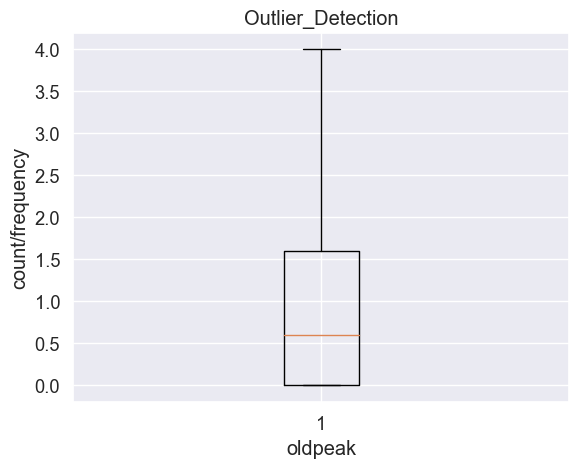

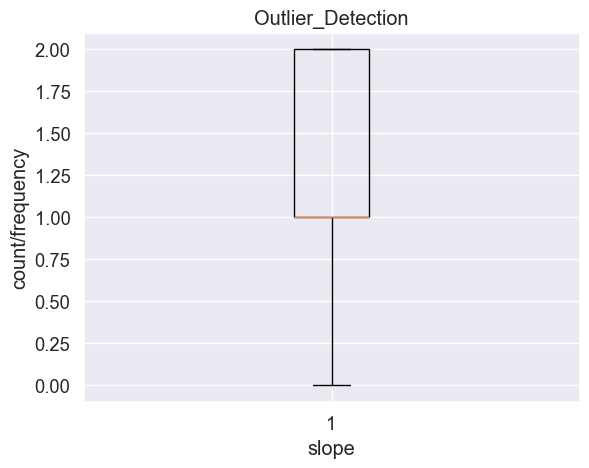

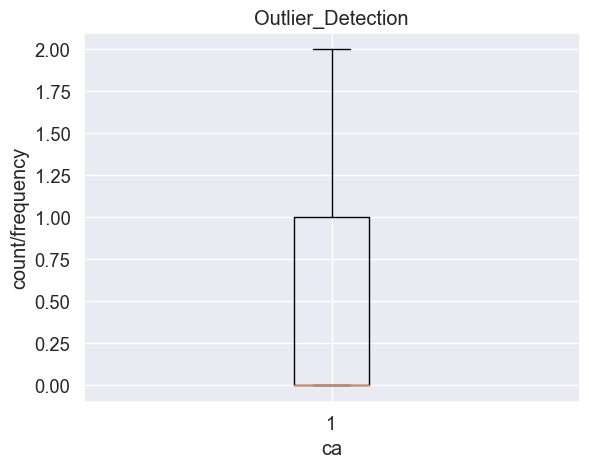

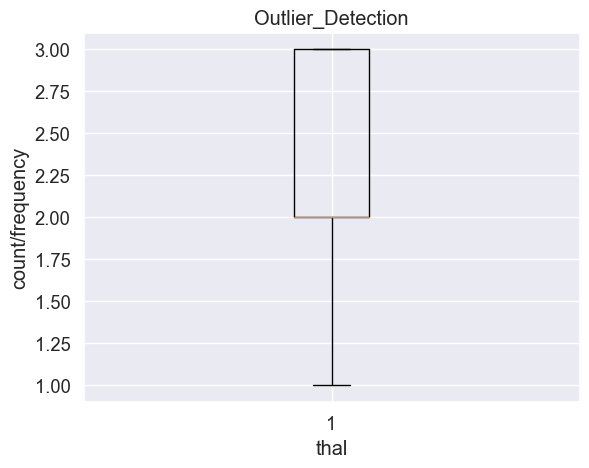

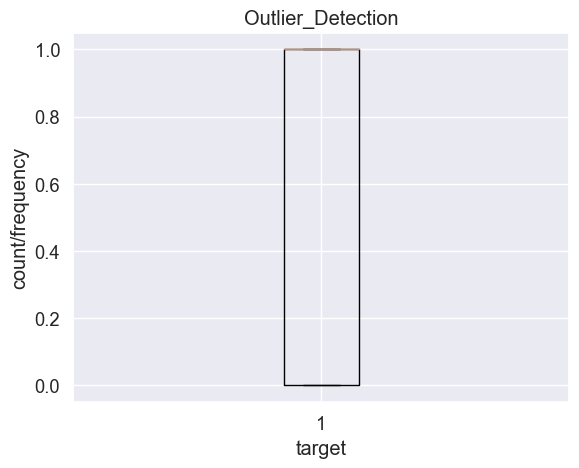

In [176]:
for i in num_cols:
    plt.boxplot(df[i])
    plt.title('Outlier_Detection')
    plt.xlabel(i)
    plt.ylabel('count/frequency')
    plt.show()

In [177]:
df.shape

(261, 14)

# Tasks To Be Performed

In [178]:
# 1. Data Analysis:
# a. Import the dataset
# b. Get information about the dataset (mean, max, min, quartiles etc.)
# c. Find the correlation between all fields

In [179]:
# b.

df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,261.0,53.777778,9.044571,29.0,46.0,55.0,60.0,76.0
sex,261.0,0.685824,0.465079,0.0,0.0,1.0,1.0,1.0
cp,261.0,1.000000,1.037749,0.0,0.0,1.0,2.0,3.0
trestbps,261.0,129.478927,15.448567,94.0,120.0,130.0,140.0,170.0
chol,261.0,242.022989,44.402957,126.0,209.0,239.0,269.0,360.0
fbs,261.0,0.126437,0.332979,0.0,0.0,0.0,0.0,1.0
restecg,261.0,0.532567,0.515055,0.0,0.0,1.0,1.0,2.0
thalach,261.0,150.992337,22.562220,88.0,138.0,155.0,168.0,202.0
exang,261.0,0.314176,0.465079,0.0,0.0,0.0,1.0,1.0
oldpeak,261.0,0.955556,1.038609,0.0,0.0,0.6,1.6,4.0


In [180]:
# c. Find the correlation between all fields

correlation_matr = df.corr()
print(correlation_matr)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.073351 -0.035241  0.278920  0.133812  0.129412   
sex      -0.073351  1.000000 -0.095629  0.004428 -0.136354  0.058807   
cp       -0.035241 -0.095629  1.000000  0.107239 -0.036392  0.144697   
trestbps  0.278920  0.004428  0.107239  1.000000  0.095666  0.137721   
chol      0.133812 -0.136354 -0.036392  0.095666  1.000000 -0.020748   
fbs       0.129412  0.058807  0.144697  0.137721 -0.020748  1.000000   
restecg  -0.093388 -0.085572  0.064762 -0.130787 -0.120110 -0.080167   
thalach  -0.402763 -0.057410  0.275477 -0.039151  0.004277 -0.009086   
exang     0.087981  0.173593 -0.374546 -0.015670  0.050308 -0.009135   
oldpeak   0.196866  0.169247 -0.121328  0.155010 -0.025590  0.024096   
slope    -0.142630 -0.061194  0.079260 -0.059844  0.055914 -0.081466   
ca        0.384780  0.089277 -0.210705  0.056375  0.087311  0.115061   
thal      0.065053  0.250717 -0.186138 -0.007052  0.078786 -0.07

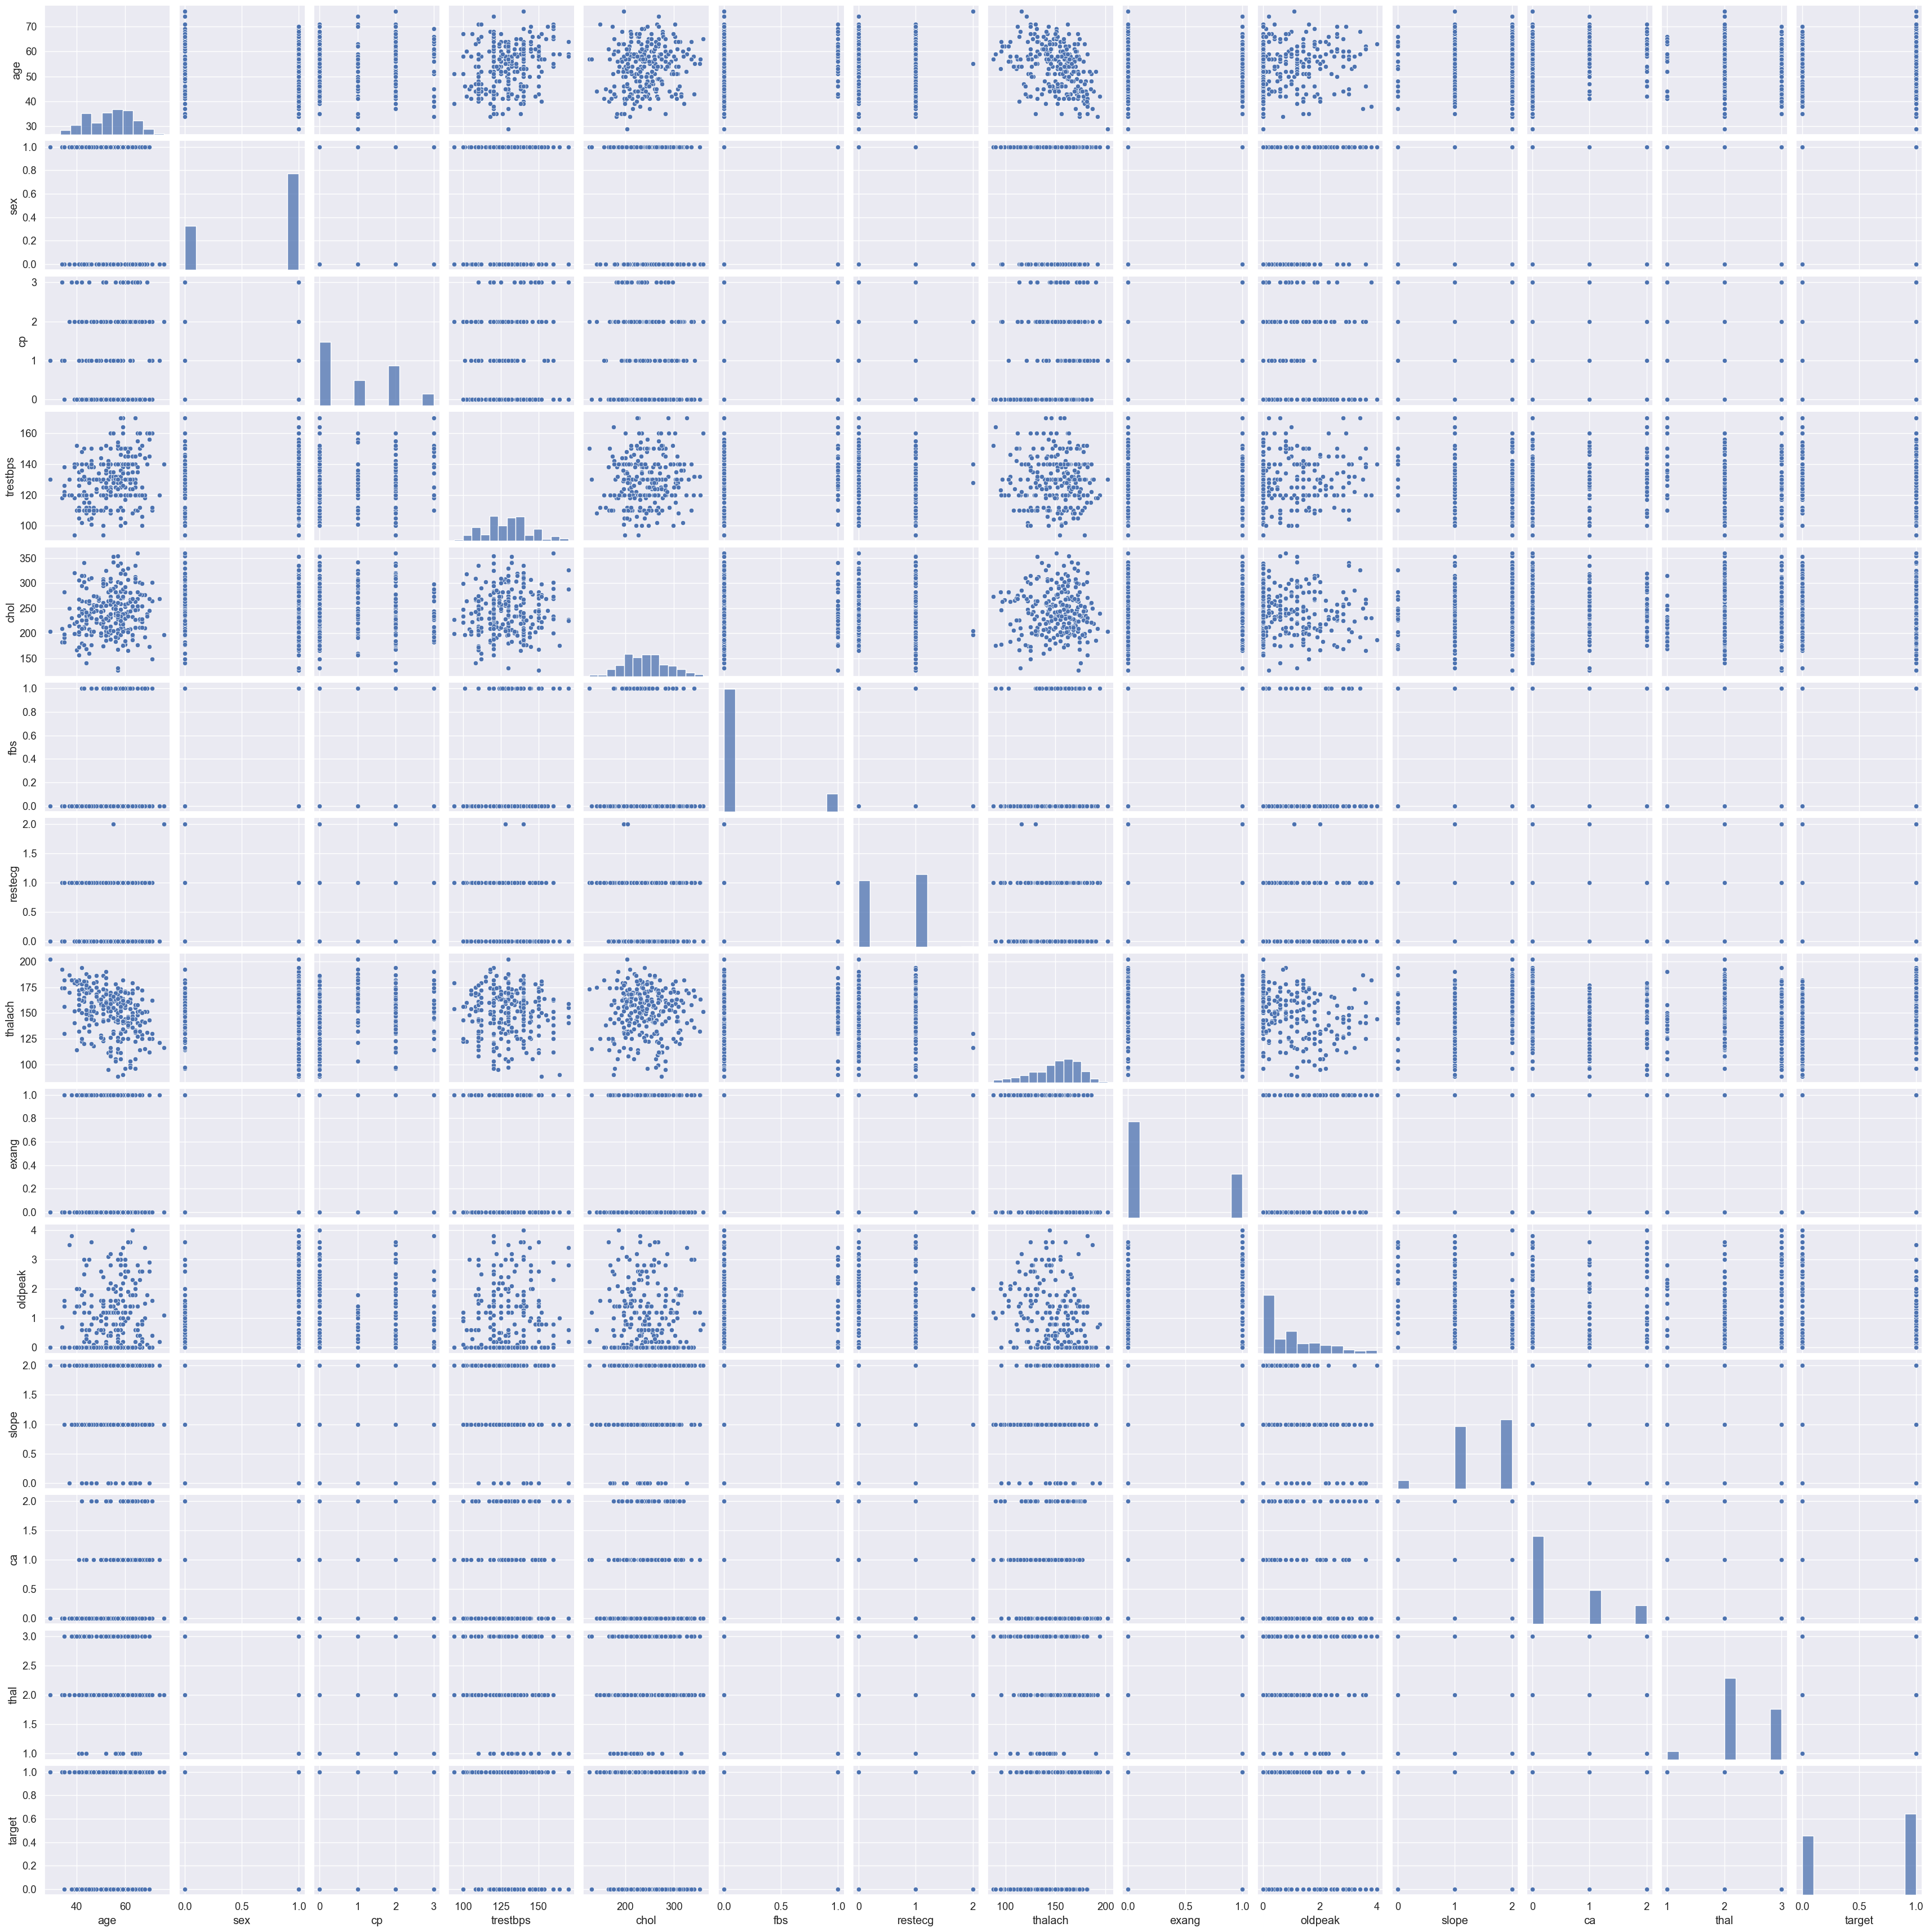

In [181]:
sns.pairplot(df)
plt.show()

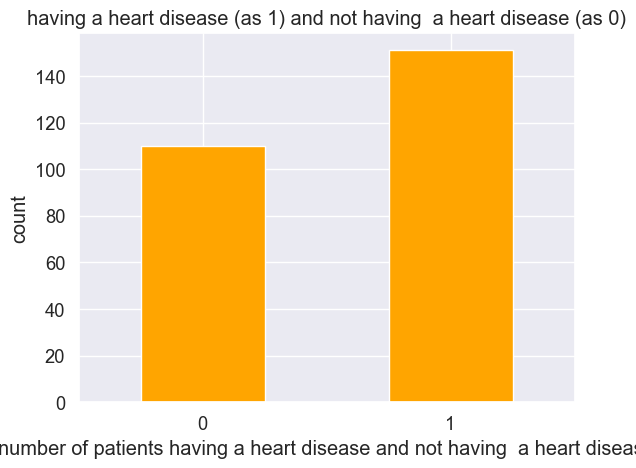

In [182]:
# 2. Data Visualization:
# a. Visualize the number of patients having a heart disease and not having
#    a heart disease
# b. Visualize the age and whether a patient has disease or not
# c. Visualize correlation between all features using a heat map

# a. Visualize the number of patients having a heart disease and not having
#    a heart disease

df['target'].value_counts().sort_index().plot(kind='bar', rot=0 ,xlabel = 
                    'number of patients having a heart disease and not having  a heart disease',
                      ylabel='count',color = 'orange')                                                       
plt.title('having a heart disease (as 1) and not having  a heart disease (as 0)')
plt.show()




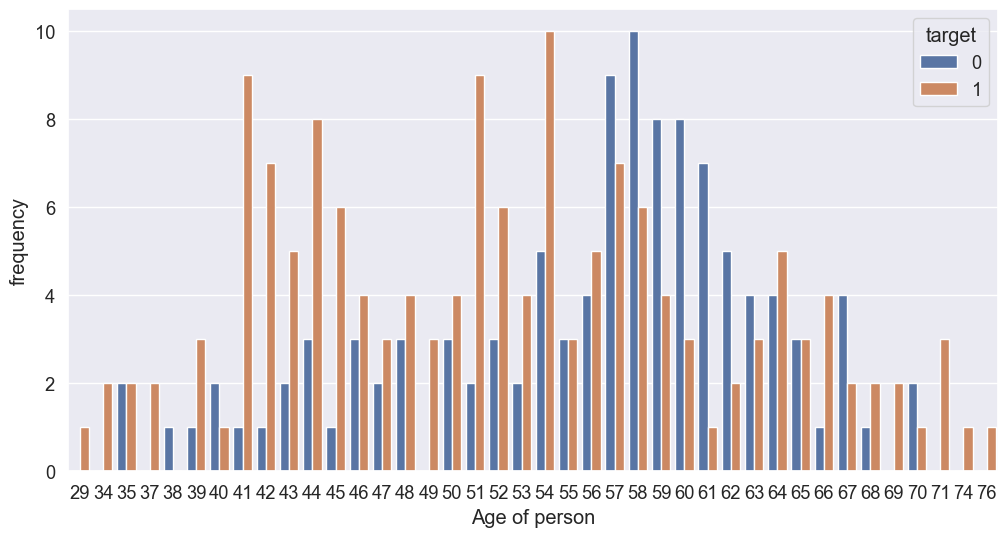

In [183]:
# b. Visualize the age and whether a patient has disease or not

plt.figure(figsize=(12,6))
sns.countplot(x = 'age', data = df, hue = 'target')
plt.xlabel('Age of person')
plt.ylabel('frequency')
plt.show()


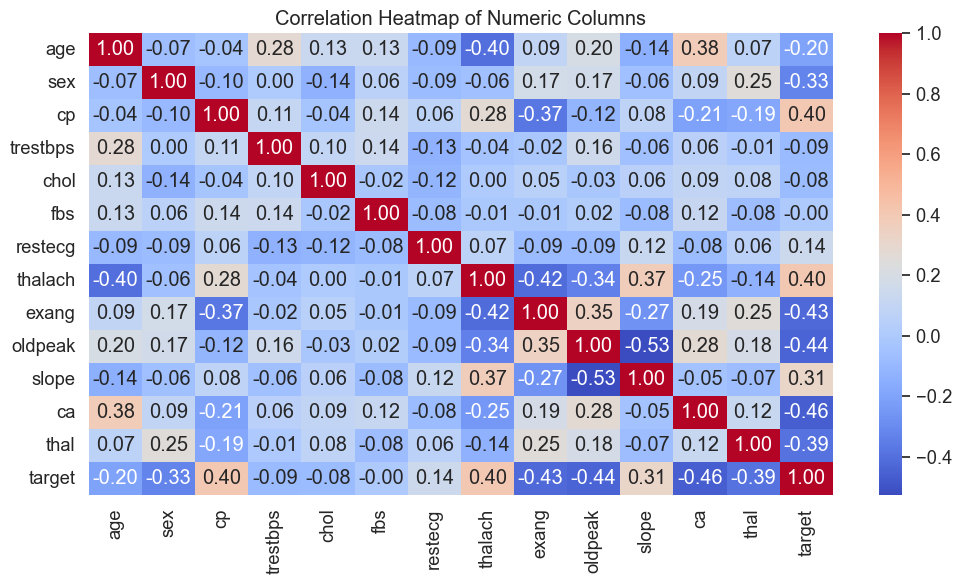

In [184]:
# c. Visualize correlation between all features using a heat map

plt.figure(figsize=(12,6))
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm' , fmt = '.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

# Logistic Regression

In [185]:
# 3. Logistic Regression:
# a. Build a simple logistic regression model:
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and get the accuracy score

# i,ii,iii

X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30 , random_state = 25)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

accuracy_logreg = accuracy_score(y_pred,y_test)
print('\n The accuracy score of LogisticRegression Model is', accuracy_logreg)

conf_matr_logreg = confusion_matrix(y_pred , y_test)
print('\nThe Confusion Matrix of Logistic Regression Model is:\n',conf_matr_logreg)

f1_scr_logreg = f1_score(y_pred , y_test)
print('\nThe f1_score of Logistic Regression Model is:\n',f1_scr_logreg)

class_rep_logreg = classification_report(y_pred , y_test)
print('\nThe classification_report of Logistic Regression Model is:\n',class_rep_logreg)


diff_actl_pred_logreg = pd.DataFrame({'Actual_Values': y_test, 'Predicted_Values': y_pred})
print('\n')
diff_actl_pred_logreg


 The accuracy score of LogisticRegression Model is 0.7721518987341772

The Confusion Matrix of Logistic Regression Model is:
 [[27  9]
 [ 9 34]]

The f1_score of Logistic Regression Model is:
 0.7906976744186046

The classification_report of Logistic Regression Model is:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        36
           1       0.79      0.79      0.79        43

    accuracy                           0.77        79
   macro avg       0.77      0.77      0.77        79
weighted avg       0.77      0.77      0.77        79





,Actual_Values,Predicted_Values
77,1,1
244,0,0
276,0,0
107,1,1
188,0,0
...,...,...
269,0,0
72,1,1
100,1,0
263,0,0


In [186]:
col = diff_actl_pred_logreg.columns.to_list()

for i in col:
    unique_val = diff_actl_pred_logreg[i].unique()
    unique_val_count = diff_actl_pred_logreg[i].value_counts()
#     unique_val_percent = (unique_val_count/len(col)) 
    print(f'{i}:\n\n {unique_val} \n {unique_val_count} ')
col


Actual_Values:

 [1 0] 
 1    43
0    36
Name: Actual_Values, dtype: int64 
Predicted_Values:

 [1 0] 
 1    43
0    36
Name: Predicted_Values, dtype: int64 


['Actual_Values', 'Predicted_Values']

In [187]:
def percent(col):
    
    value_counts = col.value_counts()
    return (value_counts / len(col)) * 100

percent_vals = diff_actl_pred_logreg.apply(percent)

print(percent_vals,'%')

   Actual_Values  Predicted_Values
1       54.43038          54.43038
0       45.56962          45.56962 %


# Decision Tree

In [188]:
# 4. Decision Tree:
# a. Build a decision tree model:
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy
# iv. Visualize the decision tree using the Graphviz package


X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30 , random_state = 25)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_dtc = accuracy_score(y_pred,y_test)
print('\n The accuracy score of DecisionTreeClassifier Model is', accuracy_dtc)

conf_matr_dtc = confusion_matrix(y_pred , y_test)
print('\nThe Confusion Matrix of DecisionTreeClassifier Model is:\n',conf_matr_dtc)

f1_scr_dtc = f1_score(y_pred , y_test)
print('\nThe f1_score of DecisionTreeClassifier Model is:\n',f1_scr_dtc)

class_rep_dtc = classification_report(y_pred , y_test)
print('\nThe classification_report of DecisionTreeClassifier Model is:\n',class_rep_dtc)

diff_actl_pred_dtc = pd.DataFrame({'Actual_Values': y_test, 'Predicted_Values': y_pred})
print('\n')
diff_actl_pred_dtc


 The accuracy score of DecisionTreeClassifier Model is 0.7721518987341772

The Confusion Matrix of DecisionTreeClassifier Model is:
 [[28 10]
 [ 8 33]]

The f1_score of DecisionTreeClassifier Model is:
 0.7857142857142858

The classification_report of DecisionTreeClassifier Model is:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        38
           1       0.77      0.80      0.79        41

    accuracy                           0.77        79
   macro avg       0.77      0.77      0.77        79
weighted avg       0.77      0.77      0.77        79





,Actual_Values,Predicted_Values
77,1,1
244,0,0
276,0,0
107,1,1
188,0,0
...,...,...
269,0,0
72,1,1
100,1,0
263,0,1


In [189]:
col = diff_actl_pred_dtc.columns.to_list()

for i in col:
    unique_val = diff_actl_pred_dtc[i].unique()
    unique_val_count = diff_actl_pred_dtc[i].value_counts()
#     unique_val_percent = (unique_val_count/len(col)) 
    print(f'{i}:\n\n {unique_val} \n {unique_val_count} ')
col

Actual_Values:

 [1 0] 
 1    43
0    36
Name: Actual_Values, dtype: int64 
Predicted_Values:

 [1 0] 
 1    41
0    38
Name: Predicted_Values, dtype: int64 


['Actual_Values', 'Predicted_Values']

In [190]:
def percent(col):
    
    value_counts = col.value_counts()
    return (value_counts / len(col)) * 100

percent_vals = diff_actl_pred_dtc.apply(percent)

print(percent_vals,'%')

   Actual_Values  Predicted_Values
1       54.43038         51.898734
0       45.56962         48.101266 %


In [191]:
# iv. Visualize the decision tree using the Graphviz package


!pip install graphviz

In [192]:
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30 , random_state = 25)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file="Decision_Tree_Heart_Disease_Pred.dot", 
#                 feature_names=X, 
#                 class_names=y,
                filled=True, rounded=True)

In [193]:
import graphviz

# Create a graph from the DOT file
with open("Decision_Tree_Heart_Disease_Pred.dot") as dot_file:
    dot_data = dot_file.read()
graph = graphviz.Source(dot_data)

# Save or display the visualization
graph.render("Decision_Tree_Heart_Disease_Pred", view=True)

'Decision_Tree_Heart_Disease_Pred.pdf'

# Random Forest

In [194]:
# 5. Random Forest:
# a. Build a Random Forest model:
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy
# iv. Visualize the model using the Graphviz Package

# i,ii,iii

X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30 , random_state = 25)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_rfc= accuracy_score(y_pred,y_test)
print('\n The accuracy score of RandomForestClassifier is', accuracy_rfc)

conf_matr_rfc = confusion_matrix(y_pred , y_test)
print('\nThe Confusion Matrix of RandomForestClassifier is:\n',conf_matr_rfc)

f1_scr_rfc = f1_score(y_pred , y_test)
print('\nThe f1_score of RandomForestClassifier is:\n',f1_scr_rfc)

class_rep_rfc = classification_report(y_pred , y_test)
print('\nThe classification_report of RandomForestClassifier is:\n',class_rep_rfc)

diff_actl_pred_rfc = pd.DataFrame({'Actual_Values': y_test, 'Predicted_Values': y_pred})
print('\n')
diff_actl_pred_rfc



 The accuracy score of RandomForestClassifier is 0.8227848101265823

The Confusion Matrix of RandomForestClassifier is:
 [[30  8]
 [ 6 35]]

The f1_score of RandomForestClassifier is:
 0.8333333333333333

The classification_report of RandomForestClassifier is:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        38
           1       0.81      0.85      0.83        41

    accuracy                           0.82        79
   macro avg       0.82      0.82      0.82        79
weighted avg       0.82      0.82      0.82        79





,Actual_Values,Predicted_Values
77,1,1
244,0,0
276,0,0
107,1,1
188,0,0
...,...,...
269,0,0
72,1,1
100,1,1
263,0,0


In [195]:
col = diff_actl_pred_rfc.columns.to_list()

for i in col:
    unique_val = diff_actl_pred_rfc[i].unique()
    unique_val_count = diff_actl_pred_rfc[i].value_counts()
#     unique_val_percent = (unique_val_count/len(col)) 
    print(f'{i}:\n\n {unique_val} \n {unique_val_count} ')
col

Actual_Values:

 [1 0] 
 1    43
0    36
Name: Actual_Values, dtype: int64 
Predicted_Values:

 [1 0] 
 1    41
0    38
Name: Predicted_Values, dtype: int64 


['Actual_Values', 'Predicted_Values']

In [196]:
def percent(col):
    
    value_counts = col.value_counts()
    return (value_counts / len(col)) * 100

percent_vals = diff_actl_pred_rfc.apply(percent)

print(percent_vals,'%')

   Actual_Values  Predicted_Values
1       54.43038         51.898734
0       45.56962         48.101266 %


In [197]:
# iv. Visualize the model using the Graphviz Package

X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30 , random_state = 25)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

from sklearn.tree import export_graphviz

single_tree = rfc.estimators_[0]

export_graphviz(single_tree, out_file="Random_Forest_Heart_Disease_Pred.dot", 
#                 feature_names=X, 
#                 class_names=y,
                filled=True, rounded=True)


In [198]:
import graphviz

# Create a graph from the DOT file
with open("Random_Forest_Heart_Disease_Pred.dot") as dot_file:
    dot_data = dot_file.read()
graph = graphviz.Source(dot_data)

# Save or display the visualization
graph.render("Random_Forest_Heart_Disease_Pred", view=True)

'Random_Forest_Heart_Disease_Pred.pdf'

In [199]:
# 6. Select the best model
# a. Print the confusion matrix of all classifiers
# b. Print the classification report of all classifiers
# c. Calculate Recall Precision and F1 score of all the models
# d. Visualize confusion matrix using heatmaps
# e. Select the best model based on the best accuracies

# a,b,c

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import *




In [200]:
# pip install lightgbm

In [201]:
# pip install catboost

In [202]:
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20 , random_state = 25)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [203]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Create a dictionary of models with their respective classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'RidgeClassifier' : RidgeClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LGBMClassifier' : LGBMClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier' : XGBClassifier(),
    'CatBoostClassifier' : CatBoostClassifier(),
    'SVC' : SVC(),
}
accuracy_models = []
models_tot = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, y_pred)
    classificationReport = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_models.append(accuracy)
    models_tot.append(model)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test,y_pred)

    print(f"Model: {name}\nConfusion_Matrix:\n {confusionMatrix},\n\nClassification_Report:\n {classificationReport}\n,Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, AUC-ROC: {auc_roc:.2f}\n\n")

    print(accuracy_models,models_tot)
    
    print('\n\n')

Model: Logistic Regression
Confusion_Matrix:
 [[20  8]
 [ 6 19]],

Classification_Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.70      0.76      0.73        25

    accuracy                           0.74        53
   macro avg       0.74      0.74      0.74        53
weighted avg       0.74      0.74      0.74        53

,Accuracy: 0.74, Precision: 0.74, Recall: 0.74, F1-score: 0.74, AUC-ROC: 0.74


[0.7358490566037735] [LogisticRegression()]



Model: RidgeClassifier
Confusion_Matrix:
 [[20  8]
 [ 2 23]],

Classification_Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.74      0.92      0.82        25

    accuracy                           0.81        53
   macro avg       0.83      0.82      0.81        53
weighted avg       0.83      0.81      0.81        53

,Accuracy: 0.81, Precision: 0.83, Recall:

Model: AdaBoostClassifier
Confusion_Matrix:
 [[21  7]
 [ 6 19]],

Classification_Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.73      0.76      0.75        25

    accuracy                           0.75        53
   macro avg       0.75      0.76      0.75        53
weighted avg       0.76      0.75      0.75        53

,Accuracy: 0.75, Precision: 0.76, Recall: 0.75, F1-score: 0.75, AUC-ROC: 0.76


[0.7358490566037735, 0.8113207547169812, 0.7169811320754716, 0.7735849056603774, 0.7169811320754716, 0.7547169811320755, 0.7735849056603774, 0.8113207547169812, 0.7547169811320755] [LogisticRegression(), RidgeClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), LGBMClassifier(), AdaBoostClassifier()]



Model: XGBClassifier
Confusion_Matrix:
 [[22  6]
 [ 5 20]],

Classification_Report:
               precision  

137:	learn: 0.3599038	total: 378ms	remaining: 2.36s
138:	learn: 0.3583733	total: 381ms	remaining: 2.36s
139:	learn: 0.3568969	total: 384ms	remaining: 2.36s
140:	learn: 0.3558981	total: 387ms	remaining: 2.36s
141:	learn: 0.3546788	total: 390ms	remaining: 2.36s
142:	learn: 0.3540895	total: 392ms	remaining: 2.35s
143:	learn: 0.3534109	total: 395ms	remaining: 2.35s
144:	learn: 0.3519480	total: 397ms	remaining: 2.34s
145:	learn: 0.3505143	total: 400ms	remaining: 2.34s
146:	learn: 0.3489424	total: 403ms	remaining: 2.34s
147:	learn: 0.3478916	total: 406ms	remaining: 2.34s
148:	learn: 0.3466062	total: 410ms	remaining: 2.34s
149:	learn: 0.3452864	total: 413ms	remaining: 2.34s
150:	learn: 0.3440613	total: 415ms	remaining: 2.33s
151:	learn: 0.3426604	total: 418ms	remaining: 2.33s
152:	learn: 0.3418628	total: 420ms	remaining: 2.33s
153:	learn: 0.3408109	total: 423ms	remaining: 2.32s
154:	learn: 0.3397987	total: 427ms	remaining: 2.33s
155:	learn: 0.3388853	total: 429ms	remaining: 2.32s
156:	learn: 

344:	learn: 0.2160086	total: 960ms	remaining: 1.82s
345:	learn: 0.2155078	total: 965ms	remaining: 1.82s
346:	learn: 0.2154010	total: 968ms	remaining: 1.82s
347:	learn: 0.2150808	total: 971ms	remaining: 1.82s
348:	learn: 0.2144925	total: 974ms	remaining: 1.82s
349:	learn: 0.2140774	total: 977ms	remaining: 1.81s
350:	learn: 0.2137034	total: 980ms	remaining: 1.81s
351:	learn: 0.2133403	total: 983ms	remaining: 1.81s
352:	learn: 0.2129627	total: 986ms	remaining: 1.81s
353:	learn: 0.2126813	total: 990ms	remaining: 1.81s
354:	learn: 0.2124550	total: 993ms	remaining: 1.8s
355:	learn: 0.2120991	total: 997ms	remaining: 1.8s
356:	learn: 0.2117955	total: 1s	remaining: 1.8s
357:	learn: 0.2113926	total: 1s	remaining: 1.8s
358:	learn: 0.2110976	total: 1.01s	remaining: 1.8s
359:	learn: 0.2107325	total: 1.01s	remaining: 1.79s
360:	learn: 0.2104987	total: 1.01s	remaining: 1.79s
361:	learn: 0.2099800	total: 1.02s	remaining: 1.79s
362:	learn: 0.2095544	total: 1.02s	remaining: 1.79s
363:	learn: 0.2090466	t

538:	learn: 0.1542598	total: 1.54s	remaining: 1.31s
539:	learn: 0.1538997	total: 1.54s	remaining: 1.31s
540:	learn: 0.1536835	total: 1.54s	remaining: 1.31s
541:	learn: 0.1534827	total: 1.55s	remaining: 1.31s
542:	learn: 0.1533059	total: 1.55s	remaining: 1.3s
543:	learn: 0.1530203	total: 1.55s	remaining: 1.3s
544:	learn: 0.1528238	total: 1.56s	remaining: 1.3s
545:	learn: 0.1526764	total: 1.56s	remaining: 1.3s
546:	learn: 0.1524669	total: 1.56s	remaining: 1.29s
547:	learn: 0.1521523	total: 1.56s	remaining: 1.29s
548:	learn: 0.1520233	total: 1.57s	remaining: 1.29s
549:	learn: 0.1518021	total: 1.57s	remaining: 1.28s
550:	learn: 0.1516738	total: 1.57s	remaining: 1.28s
551:	learn: 0.1515084	total: 1.58s	remaining: 1.28s
552:	learn: 0.1513393	total: 1.58s	remaining: 1.28s
553:	learn: 0.1511423	total: 1.58s	remaining: 1.27s
554:	learn: 0.1508979	total: 1.58s	remaining: 1.27s
555:	learn: 0.1508314	total: 1.59s	remaining: 1.27s
556:	learn: 0.1505684	total: 1.59s	remaining: 1.26s
557:	learn: 0.15

741:	learn: 0.1163325	total: 2.12s	remaining: 737ms
742:	learn: 0.1162267	total: 2.12s	remaining: 734ms
743:	learn: 0.1159915	total: 2.13s	remaining: 731ms
744:	learn: 0.1157203	total: 2.13s	remaining: 729ms
745:	learn: 0.1155494	total: 2.13s	remaining: 726ms
746:	learn: 0.1154499	total: 2.13s	remaining: 723ms
747:	learn: 0.1152665	total: 2.14s	remaining: 720ms
748:	learn: 0.1151918	total: 2.14s	remaining: 718ms
749:	learn: 0.1151686	total: 2.14s	remaining: 715ms
750:	learn: 0.1149593	total: 2.15s	remaining: 712ms
751:	learn: 0.1147428	total: 2.15s	remaining: 709ms
752:	learn: 0.1144718	total: 2.15s	remaining: 706ms
753:	learn: 0.1143435	total: 2.16s	remaining: 704ms
754:	learn: 0.1142295	total: 2.16s	remaining: 701ms
755:	learn: 0.1141359	total: 2.16s	remaining: 699ms
756:	learn: 0.1139549	total: 2.17s	remaining: 696ms
757:	learn: 0.1137485	total: 2.17s	remaining: 693ms
758:	learn: 0.1135991	total: 2.17s	remaining: 690ms
759:	learn: 0.1134992	total: 2.18s	remaining: 687ms
760:	learn: 

926:	learn: 0.0925133	total: 2.72s	remaining: 214ms
927:	learn: 0.0923672	total: 2.72s	remaining: 211ms
928:	learn: 0.0922251	total: 2.73s	remaining: 208ms
929:	learn: 0.0920595	total: 2.73s	remaining: 206ms
930:	learn: 0.0918766	total: 2.73s	remaining: 203ms
931:	learn: 0.0917443	total: 2.74s	remaining: 200ms
932:	learn: 0.0917293	total: 2.74s	remaining: 197ms
933:	learn: 0.0915515	total: 2.74s	remaining: 194ms
934:	learn: 0.0914063	total: 2.75s	remaining: 191ms
935:	learn: 0.0912761	total: 2.75s	remaining: 188ms
936:	learn: 0.0911298	total: 2.75s	remaining: 185ms
937:	learn: 0.0909760	total: 2.75s	remaining: 182ms
938:	learn: 0.0908870	total: 2.76s	remaining: 179ms
939:	learn: 0.0908082	total: 2.76s	remaining: 176ms
940:	learn: 0.0907275	total: 2.77s	remaining: 173ms
941:	learn: 0.0906120	total: 2.77s	remaining: 170ms
942:	learn: 0.0905560	total: 2.77s	remaining: 168ms
943:	learn: 0.0904126	total: 2.78s	remaining: 165ms
944:	learn: 0.0902322	total: 2.78s	remaining: 162ms
945:	learn: 

In [204]:
# e. Select the best model based on the best accuracies

df_data = {'Model_name':models_tot,'Accuracy_of_each_model':accuracy_models}
df_accur = pd.DataFrame(df_data)
Highest_Accuracy_Model = df_accur[df_accur['Accuracy_of_each_model'] == df_accur['Accuracy_of_each_model'].max() ]
print('Higest_Accuracy_Model is :')
Highest_Accuracy_Model


Higest_Accuracy_Model is :


,Model_name,Accuracy_of_each_model
1,RidgeClassifier(),0.811321
7,LGBMClassifier(),0.811321


Model: Logistic Regression
Confusion_Matrix:
 [[20  8]
 [ 6 19]]


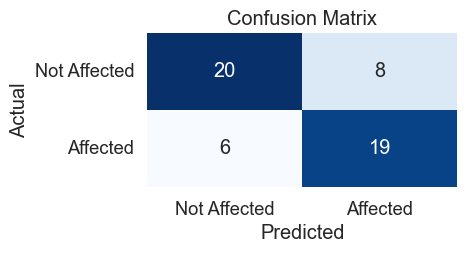

***-----------------------------------******---------------------------------------***


Model: RidgeClassifier
Confusion_Matrix:
 [[20  8]
 [ 2 23]]


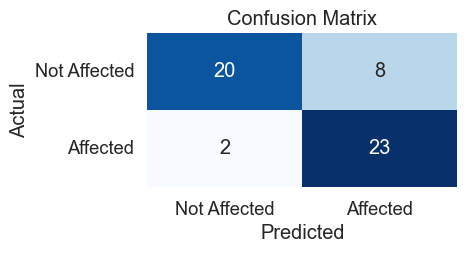

***-----------------------------------******---------------------------------------***


Model: Decision Tree
Confusion_Matrix:
 [[18 10]
 [ 8 17]]


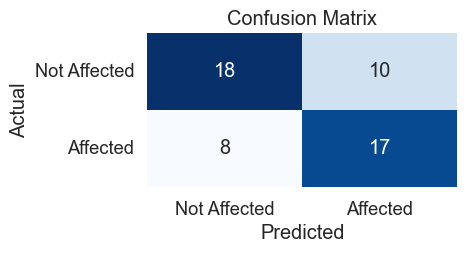

***-----------------------------------******---------------------------------------***


Model: Random Forest
Confusion_Matrix:
 [[21  7]
 [ 5 20]]


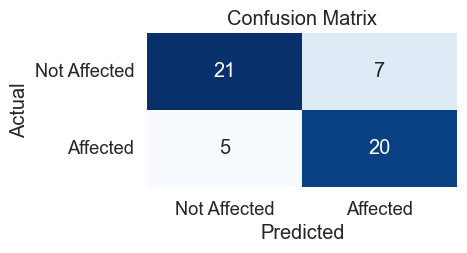

***-----------------------------------******---------------------------------------***


Model: BaggingClassifier
Confusion_Matrix:
 [[23  5]
 [ 8 17]]


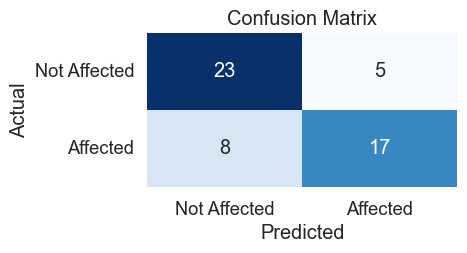

***-----------------------------------******---------------------------------------***


Model: ExtraTreesClassifier
Confusion_Matrix:
 [[22  6]
 [ 6 19]]


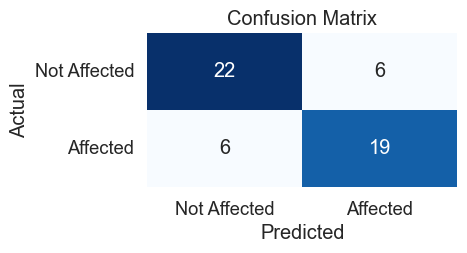

***-----------------------------------******---------------------------------------***


Model: GradientBoostingClassifier
Confusion_Matrix:
 [[22  6]
 [ 5 20]]


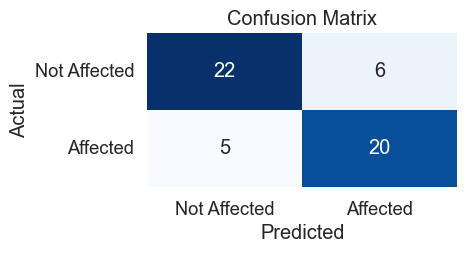

***-----------------------------------******---------------------------------------***


[LightGBM] [Info] Number of positive: 126, number of negative: 82
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 208, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.605769 -> initscore=0.429563
[LightGBM] [Info] Start training from score 0.429563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

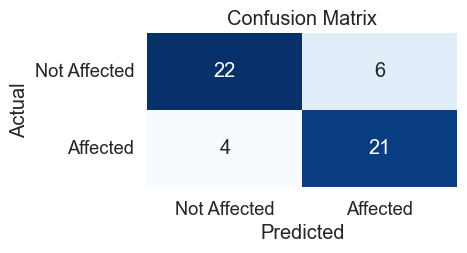

***-----------------------------------******---------------------------------------***


Model: AdaBoostClassifier
Confusion_Matrix:
 [[21  7]
 [ 6 19]]


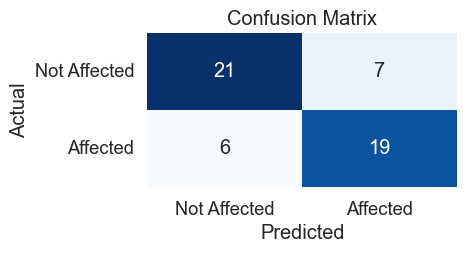

***-----------------------------------******---------------------------------------***


Model: XGBClassifier
Confusion_Matrix:
 [[22  6]
 [ 5 20]]


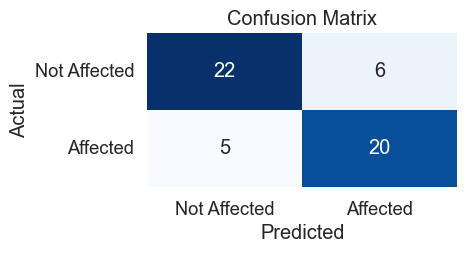

***-----------------------------------******---------------------------------------***


Learning rate set to 0.005269
0:	learn: 0.6881677	total: 3.59ms	remaining: 3.59s
1:	learn: 0.6834765	total: 6.58ms	remaining: 3.28s
2:	learn: 0.6795120	total: 10.2ms	remaining: 3.38s
3:	learn: 0.6749481	total: 13.4ms	remaining: 3.33s
4:	learn: 0.6704192	total: 15.9ms	remaining: 3.16s
5:	learn: 0.6660425	total: 18.9ms	remaining: 3.13s
6:	learn: 0.6621900	total: 23ms	remaining: 3.27s
7:	learn: 0.6577017	total: 26.2ms	remaining: 3.25s
8:	learn: 0.6532977	total: 29.6ms	remaining: 3.26s
9:	learn: 0.6498913	total: 34.1ms	remaining: 3.38s
10:	learn: 0.6452726	total: 38.5ms	remaining: 3.46s
11:	learn: 0.6410693	total: 45.4ms	remaining: 3.73s
12:	learn: 0.6373043	total: 50.1ms	remaining: 3.81s
13:	learn: 0.6329382	total: 55.1ms	remaining: 3.88s
14:	learn: 0.6300210	total: 59.5ms	remaining: 3.91s
15:	learn: 0.6260942	total: 63.2ms	remaining: 3.89s
16:	learn: 0.6227369	total: 67.1ms	remaining: 3.88s
17:	learn

191:	learn: 0.3051624	total: 581ms	remaining: 2.45s
192:	learn: 0.3042684	total: 585ms	remaining: 2.45s
193:	learn: 0.3033838	total: 588ms	remaining: 2.44s
194:	learn: 0.3026419	total: 591ms	remaining: 2.44s
195:	learn: 0.3016724	total: 594ms	remaining: 2.44s
196:	learn: 0.3006787	total: 597ms	remaining: 2.43s
197:	learn: 0.2997026	total: 600ms	remaining: 2.43s
198:	learn: 0.2987579	total: 603ms	remaining: 2.43s
199:	learn: 0.2977860	total: 606ms	remaining: 2.42s
200:	learn: 0.2970911	total: 609ms	remaining: 2.42s
201:	learn: 0.2964255	total: 612ms	remaining: 2.42s
202:	learn: 0.2955526	total: 616ms	remaining: 2.42s
203:	learn: 0.2948360	total: 619ms	remaining: 2.41s
204:	learn: 0.2941250	total: 621ms	remaining: 2.41s
205:	learn: 0.2933483	total: 624ms	remaining: 2.4s
206:	learn: 0.2923540	total: 627ms	remaining: 2.4s
207:	learn: 0.2920566	total: 629ms	remaining: 2.4s
208:	learn: 0.2911417	total: 632ms	remaining: 2.39s
209:	learn: 0.2902806	total: 635ms	remaining: 2.39s
210:	learn: 0.2

396:	learn: 0.1964395	total: 1.16s	remaining: 1.76s
397:	learn: 0.1961401	total: 1.16s	remaining: 1.75s
398:	learn: 0.1957763	total: 1.16s	remaining: 1.75s
399:	learn: 0.1953753	total: 1.17s	remaining: 1.75s
400:	learn: 0.1951864	total: 1.17s	remaining: 1.75s
401:	learn: 0.1946856	total: 1.17s	remaining: 1.74s
402:	learn: 0.1943221	total: 1.18s	remaining: 1.74s
403:	learn: 0.1938174	total: 1.18s	remaining: 1.74s
404:	learn: 0.1934964	total: 1.18s	remaining: 1.74s
405:	learn: 0.1932585	total: 1.18s	remaining: 1.73s
406:	learn: 0.1930885	total: 1.19s	remaining: 1.73s
407:	learn: 0.1926660	total: 1.19s	remaining: 1.73s
408:	learn: 0.1923418	total: 1.19s	remaining: 1.73s
409:	learn: 0.1918931	total: 1.2s	remaining: 1.72s
410:	learn: 0.1915012	total: 1.2s	remaining: 1.72s
411:	learn: 0.1911062	total: 1.2s	remaining: 1.72s
412:	learn: 0.1907419	total: 1.21s	remaining: 1.71s
413:	learn: 0.1904822	total: 1.21s	remaining: 1.71s
414:	learn: 0.1899239	total: 1.21s	remaining: 1.71s
415:	learn: 0.1

596:	learn: 0.1417232	total: 1.74s	remaining: 1.17s
597:	learn: 0.1415710	total: 1.74s	remaining: 1.17s
598:	learn: 0.1413941	total: 1.74s	remaining: 1.17s
599:	learn: 0.1412852	total: 1.75s	remaining: 1.17s
600:	learn: 0.1410231	total: 1.75s	remaining: 1.16s
601:	learn: 0.1408381	total: 1.75s	remaining: 1.16s
602:	learn: 0.1405537	total: 1.76s	remaining: 1.16s
603:	learn: 0.1404003	total: 1.76s	remaining: 1.15s
604:	learn: 0.1402688	total: 1.76s	remaining: 1.15s
605:	learn: 0.1400178	total: 1.77s	remaining: 1.15s
606:	learn: 0.1398802	total: 1.77s	remaining: 1.15s
607:	learn: 0.1396274	total: 1.77s	remaining: 1.14s
608:	learn: 0.1394303	total: 1.78s	remaining: 1.14s
609:	learn: 0.1392694	total: 1.78s	remaining: 1.14s
610:	learn: 0.1390762	total: 1.78s	remaining: 1.14s
611:	learn: 0.1389360	total: 1.78s	remaining: 1.13s
612:	learn: 0.1387521	total: 1.79s	remaining: 1.13s
613:	learn: 0.1386281	total: 1.79s	remaining: 1.13s
614:	learn: 0.1384969	total: 1.79s	remaining: 1.12s
615:	learn: 

761:	learn: 0.1132514	total: 2.21s	remaining: 692ms
762:	learn: 0.1130716	total: 2.22s	remaining: 689ms
763:	learn: 0.1129719	total: 2.22s	remaining: 686ms
764:	learn: 0.1128982	total: 2.22s	remaining: 683ms
765:	learn: 0.1126942	total: 2.23s	remaining: 681ms
766:	learn: 0.1126436	total: 2.23s	remaining: 678ms
767:	learn: 0.1123891	total: 2.23s	remaining: 675ms
768:	learn: 0.1122686	total: 2.24s	remaining: 672ms
769:	learn: 0.1120828	total: 2.24s	remaining: 669ms
770:	learn: 0.1118934	total: 2.24s	remaining: 666ms
771:	learn: 0.1117725	total: 2.25s	remaining: 664ms
772:	learn: 0.1116586	total: 2.25s	remaining: 661ms
773:	learn: 0.1114110	total: 2.25s	remaining: 658ms
774:	learn: 0.1112539	total: 2.25s	remaining: 655ms
775:	learn: 0.1111371	total: 2.26s	remaining: 652ms
776:	learn: 0.1110267	total: 2.26s	remaining: 649ms
777:	learn: 0.1109441	total: 2.26s	remaining: 646ms
778:	learn: 0.1107425	total: 2.27s	remaining: 643ms
779:	learn: 0.1106056	total: 2.27s	remaining: 640ms
780:	learn: 

956:	learn: 0.0889876	total: 2.78s	remaining: 125ms
957:	learn: 0.0888305	total: 2.78s	remaining: 122ms
958:	learn: 0.0886786	total: 2.78s	remaining: 119ms
959:	learn: 0.0884968	total: 2.79s	remaining: 116ms
960:	learn: 0.0883946	total: 2.79s	remaining: 113ms
961:	learn: 0.0882986	total: 2.79s	remaining: 110ms
962:	learn: 0.0881798	total: 2.79s	remaining: 107ms
963:	learn: 0.0880930	total: 2.8s	remaining: 105ms
964:	learn: 0.0879658	total: 2.8s	remaining: 102ms
965:	learn: 0.0878629	total: 2.8s	remaining: 98.7ms
966:	learn: 0.0877813	total: 2.81s	remaining: 95.8ms
967:	learn: 0.0876702	total: 2.81s	remaining: 93ms
968:	learn: 0.0875218	total: 2.81s	remaining: 90ms
969:	learn: 0.0873921	total: 2.82s	remaining: 87.2ms
970:	learn: 0.0873065	total: 2.82s	remaining: 84.3ms
971:	learn: 0.0872082	total: 2.82s	remaining: 81.4ms
972:	learn: 0.0871313	total: 2.83s	remaining: 78.4ms
973:	learn: 0.0871039	total: 2.83s	remaining: 75.5ms
974:	learn: 0.0869506	total: 2.83s	remaining: 72.6ms
975:	lear

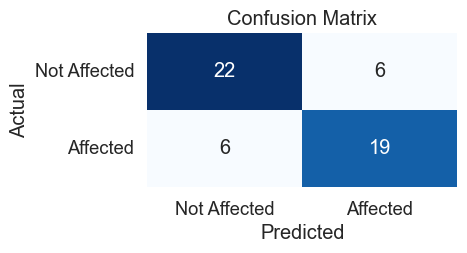

***-----------------------------------******---------------------------------------***


Model: SVC
Confusion_Matrix:
 [[20  8]
 [ 5 20]]


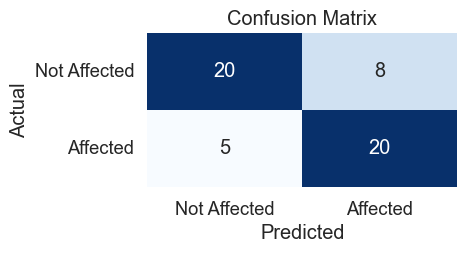

***-----------------------------------******---------------------------------------***




In [205]:
# d. Visualize confusion matrix using Heatmaps

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Create a dictionary of models with their respective classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'RidgeClassifier' : RidgeClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LGBMClassifier' : LGBMClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier' : XGBClassifier(),
    'CatBoostClassifier' : CatBoostClassifier(),
    'SVC' : SVC(),
}
accuracy_models = []
models_tot = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, y_pred)
    print(f"Model: {name}\nConfusion_Matrix:\n {confusionMatrix}")
    plt.figure(figsize=(4, 2))
    sns.set(font_scale=1.2)  # Adjust font size
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Affected', 'Affected'], yticklabels=['Not Affected', 'Affected'])

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print('***-----------------------------------******---------------------------------------***')
    print('\n')
#     classificationReport = classification_report(y_test, y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_models.append(accuracy)
#     models_tot.append(model)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
#     auc_roc = roc_auc_score(y_test,y_pred)

#     print(f"Model: {name}\nConfusion_Matrix:\n {confusionMatrix},\n\nClassification_Report:\n {classificationReport}\n,Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, AUC-ROC: {auc_roc:.2f}\n\n")

#     print(accuracy_models,models_tot)
    
#     print('\n\n')

In [206]:
# Trying LDA feature selection Technique

In [133]:
X = df.drop(columns=['target'],axis=1)
y = df['target']

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [135]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [136]:
# Linear Discriminant Analysis

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [138]:
lda=LinearDiscriminantAnalysis()

In [139]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [140]:
lda.transform(x_test)

array([[-1.33840077],
       [-1.48686539],
       [ 1.51492134],
       [-0.86171508],
       [ 3.2230714 ],
       [ 0.36154071],
       [ 0.65430812],
       [-2.46611567],
       [-0.33530836],
       [ 1.07629098],
       [ 0.64074775],
       [ 1.95007531],
       [ 0.17572966],
       [ 0.57021824],
       [ 2.02157592],
       [-2.35583148],
       [-0.83049907],
       [-0.4931835 ],
       [ 2.60148537],
       [ 1.99149984],
       [-1.14118756],
       [-1.1202277 ],
       [ 0.44891324],
       [-1.53322779],
       [ 1.89055357],
       [-0.10602484],
       [-0.08705369],
       [-1.11190138],
       [ 1.36205514],
       [-2.17583141],
       [-0.31449079],
       [ 3.21576887],
       [-0.3970196 ],
       [-0.55282769],
       [ 0.22701993],
       [-1.01791218],
       [-0.42743606],
       [-1.75847739],
       [-2.19942868],
       [-0.14904803],
       [-3.03492691],
       [ 2.25385554],
       [-1.13441283],
       [ 1.44453843],
       [ 0.6275495 ],
       [-0

In [141]:
lda_coefficients=np.exp(np.abs(lda.coef_))

In [142]:
lda_coefficients= lda_coefficients.flatten()

In [143]:
lda_coefficients

array([1.14261293, 1.92770182, 2.65215494, 1.64555497, 1.42227356,
       1.05121484, 1.18048893, 1.84400403, 1.32615701, 1.512908  ,
       1.90182944, 4.15829557, 2.07321012])

In [144]:
num_features=X.shape[1]

In [145]:
num_features

13

In [146]:
feature_indices=np.arange(num_features)

In [147]:
feature_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [148]:
feature_names=list(X.columns)

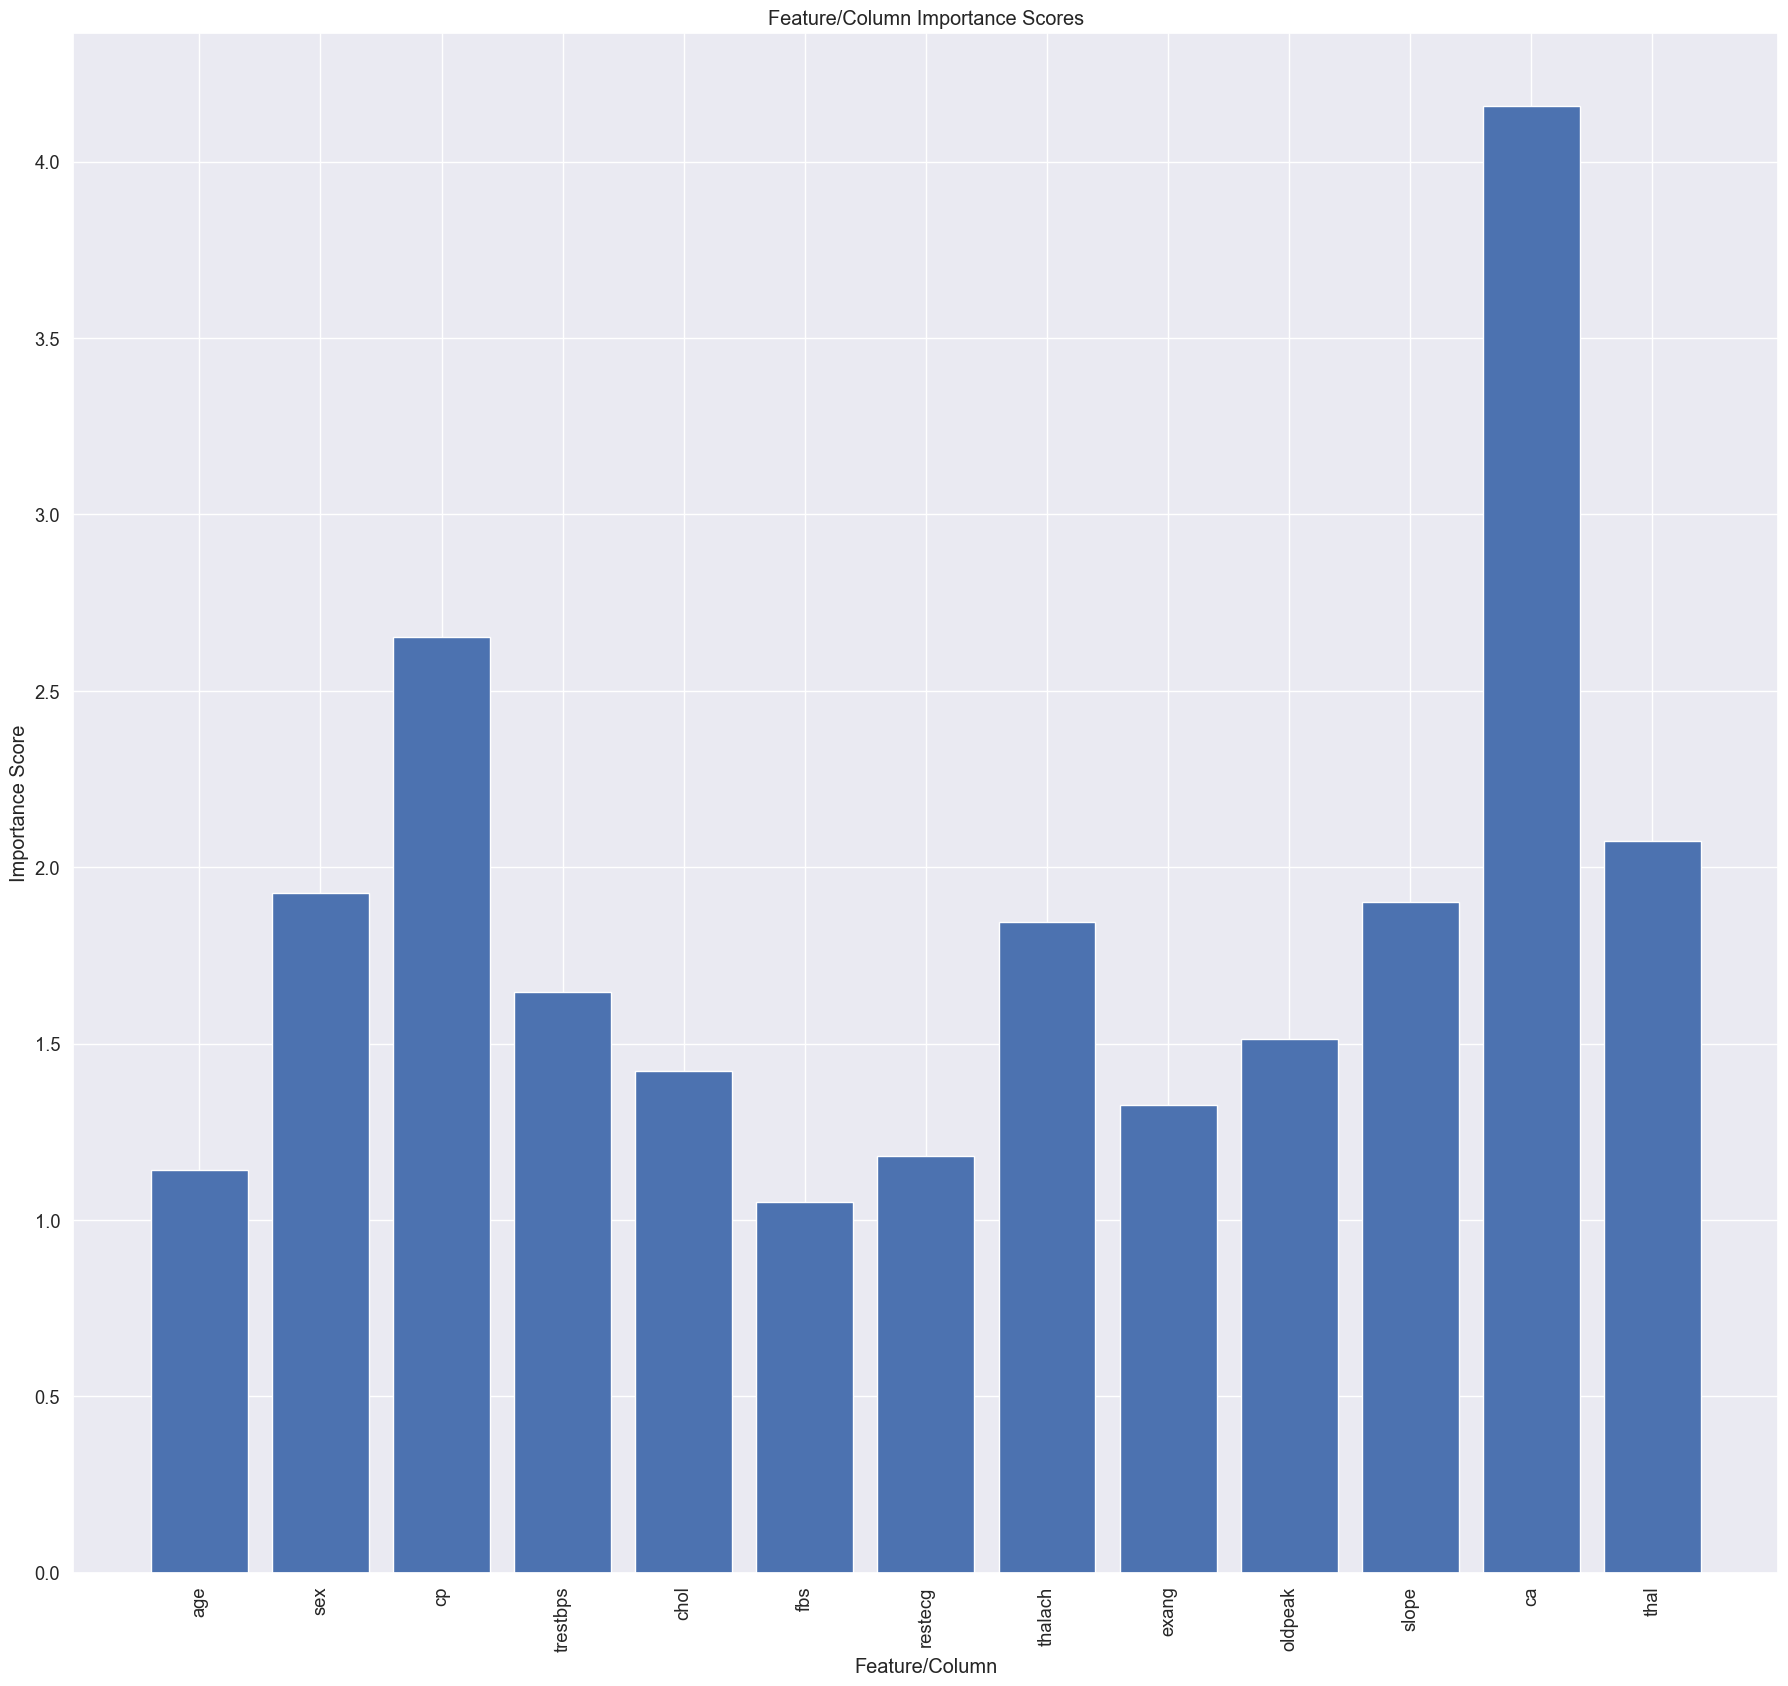

In [149]:
plt.figure(figsize=(22,20))
plt.bar(feature_indices,lda_coefficients)
plt.xticks(feature_indices,feature_names,rotation="vertical")
plt.xlabel('Feature/Column')
plt.ylabel('Importance Score')
plt.title('Feature/Column Importance Scores')
plt.show()

In [150]:
df_feature_score=pd.DataFrame({"Feature_names":feature_names,"feature_scores":lda_coefficients})

In [151]:
top_15_values=df_feature_score.nlargest(15,'feature_scores')

In [152]:
top_15_values.head(15)

,Feature_names,feature_scores
11,ca,4.158296
2,cp,2.652155
12,thal,2.073210
1,sex,1.927702
10,slope,1.901829
7,thalach,1.844004
3,trestbps,1.645555
9,oldpeak,1.512908
4,chol,1.422274
8,exang,1.326157


In [153]:
top_15_values.index

Int64Index([11, 2, 12, 1, 10, 7, 3, 9, 4, 8, 6, 0, 5], dtype='int64')

In [154]:
x_train=x_train[:,[11, 2, 12, 1, 10, 7, 3, 9, 4, 8, 6, 0, 5]]

In [155]:
x_test=x_test[:,[11, 2, 12, 1, 10, 7, 3, 9, 4, 8, 6, 0, 5]]

In [156]:
!pip install xgboost

In [157]:
# 6. Select the best model
# a. Print the confusion matrix of all classifiers
# b. Print the classification report of all classifiers
# c. Calculate Recall Precision and F1 score of all the models
# d. Visualize confusion matrix using heatmaps
# e. Select the best model based on the best accuracies

# a,b,c

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import *




In [158]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Create a dictionary of models with their respective classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'RidgeClassifier' : RidgeClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LGBMClassifier' : LGBMClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier' : XGBClassifier(),
    'CatBoostClassifier' : CatBoostClassifier(),
    'SVC' : SVC(),
}
accuracy_models = []
models_tot = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, y_pred)
    classificationReport = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_models.append(accuracy)
    models_tot.append(model)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test,y_pred)

    print(f"Model: {name}\nConfusion_Matrix:\n {confusionMatrix},\n\nClassification_Report:\n {classificationReport}\n,Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, AUC-ROC: {auc_roc:.2f}\n\n")

    print(accuracy_models,models_tot)
    
    print('\n\n')

Model: Logistic Regression
Confusion_Matrix:
 [[11 11]
 [12 19]],

Classification_Report:
               precision    recall  f1-score   support

           0       0.48      0.50      0.49        22
           1       0.63      0.61      0.62        31

    accuracy                           0.57        53
   macro avg       0.56      0.56      0.56        53
weighted avg       0.57      0.57      0.57        53

,Accuracy: 0.57, Precision: 0.57, Recall: 0.57, F1-score: 0.57, AUC-ROC: 0.56


[0.5660377358490566] [LogisticRegression()]



Model: RidgeClassifier
Confusion_Matrix:
 [[11 11]
 [12 19]],

Classification_Report:
               precision    recall  f1-score   support

           0       0.48      0.50      0.49        22
           1       0.63      0.61      0.62        31

    accuracy                           0.57        53
   macro avg       0.56      0.56      0.56        53
weighted avg       0.57      0.57      0.57        53

,Accuracy: 0.57, Precision: 0.57, Recall:

Model: AdaBoostClassifier
Confusion_Matrix:
 [[10 12]
 [10 21]],

Classification_Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.48        22
           1       0.64      0.68      0.66        31

    accuracy                           0.58        53
   macro avg       0.57      0.57      0.57        53
weighted avg       0.58      0.58      0.58        53

,Accuracy: 0.58, Precision: 0.58, Recall: 0.58, F1-score: 0.58, AUC-ROC: 0.57


[0.5660377358490566, 0.5660377358490566, 0.4528301886792453, 0.5660377358490566, 0.4716981132075472, 0.5849056603773585, 0.4339622641509434, 0.49056603773584906, 0.5849056603773585] [LogisticRegression(), RidgeClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), LGBMClassifier(), AdaBoostClassifier()]



Model: XGBClassifier
Confusion_Matrix:
 [[10 12]
 [15 16]],

Classification_Report:
               precision 

126:	learn: 0.5922351	total: 386ms	remaining: 2.66s
127:	learn: 0.5912750	total: 391ms	remaining: 2.66s
128:	learn: 0.5901858	total: 393ms	remaining: 2.66s
129:	learn: 0.5895390	total: 396ms	remaining: 2.65s
130:	learn: 0.5887531	total: 399ms	remaining: 2.65s
131:	learn: 0.5880684	total: 402ms	remaining: 2.65s
132:	learn: 0.5874553	total: 405ms	remaining: 2.64s
133:	learn: 0.5866152	total: 408ms	remaining: 2.64s
134:	learn: 0.5858589	total: 411ms	remaining: 2.63s
135:	learn: 0.5854038	total: 415ms	remaining: 2.63s
136:	learn: 0.5849526	total: 418ms	remaining: 2.63s
137:	learn: 0.5838961	total: 421ms	remaining: 2.63s
138:	learn: 0.5834027	total: 424ms	remaining: 2.63s
139:	learn: 0.5826736	total: 428ms	remaining: 2.63s
140:	learn: 0.5823135	total: 431ms	remaining: 2.62s
141:	learn: 0.5813874	total: 434ms	remaining: 2.62s
142:	learn: 0.5812607	total: 437ms	remaining: 2.62s
143:	learn: 0.5807847	total: 440ms	remaining: 2.62s
144:	learn: 0.5804992	total: 443ms	remaining: 2.61s
145:	learn: 

319:	learn: 0.4890360	total: 973ms	remaining: 2.07s
320:	learn: 0.4883668	total: 977ms	remaining: 2.07s
321:	learn: 0.4875398	total: 980ms	remaining: 2.06s
322:	learn: 0.4872560	total: 983ms	remaining: 2.06s
323:	learn: 0.4866520	total: 986ms	remaining: 2.06s
324:	learn: 0.4861927	total: 989ms	remaining: 2.05s
325:	learn: 0.4857269	total: 992ms	remaining: 2.05s
326:	learn: 0.4853947	total: 995ms	remaining: 2.05s
327:	learn: 0.4849526	total: 998ms	remaining: 2.04s
328:	learn: 0.4844061	total: 1s	remaining: 2.04s
329:	learn: 0.4842057	total: 1s	remaining: 2.04s
330:	learn: 0.4831565	total: 1.01s	remaining: 2.04s
331:	learn: 0.4827271	total: 1.01s	remaining: 2.03s
332:	learn: 0.4821741	total: 1.01s	remaining: 2.03s
333:	learn: 0.4814294	total: 1.02s	remaining: 2.03s
334:	learn: 0.4809159	total: 1.02s	remaining: 2.03s
335:	learn: 0.4804421	total: 1.02s	remaining: 2.02s
336:	learn: 0.4804057	total: 1.02s	remaining: 2.02s
337:	learn: 0.4797854	total: 1.03s	remaining: 2.01s
338:	learn: 0.4794

507:	learn: 0.4177150	total: 1.51s	remaining: 1.47s
508:	learn: 0.4172666	total: 1.52s	remaining: 1.46s
509:	learn: 0.4171063	total: 1.52s	remaining: 1.46s
510:	learn: 0.4165843	total: 1.52s	remaining: 1.46s
511:	learn: 0.4164797	total: 1.53s	remaining: 1.46s
512:	learn: 0.4162371	total: 1.53s	remaining: 1.45s
513:	learn: 0.4160425	total: 1.53s	remaining: 1.45s
514:	learn: 0.4153390	total: 1.54s	remaining: 1.45s
515:	learn: 0.4151077	total: 1.54s	remaining: 1.44s
516:	learn: 0.4149096	total: 1.54s	remaining: 1.44s
517:	learn: 0.4144578	total: 1.55s	remaining: 1.44s
518:	learn: 0.4142581	total: 1.55s	remaining: 1.44s
519:	learn: 0.4139328	total: 1.55s	remaining: 1.43s
520:	learn: 0.4136894	total: 1.56s	remaining: 1.43s
521:	learn: 0.4134279	total: 1.56s	remaining: 1.43s
522:	learn: 0.4130502	total: 1.56s	remaining: 1.43s
523:	learn: 0.4127369	total: 1.56s	remaining: 1.42s
524:	learn: 0.4124815	total: 1.57s	remaining: 1.42s
525:	learn: 0.4120296	total: 1.57s	remaining: 1.42s
526:	learn: 

705:	learn: 0.3576636	total: 2.09s	remaining: 871ms
706:	learn: 0.3574631	total: 2.1s	remaining: 868ms
707:	learn: 0.3572526	total: 2.1s	remaining: 865ms
708:	learn: 0.3566145	total: 2.1s	remaining: 862ms
709:	learn: 0.3563180	total: 2.1s	remaining: 859ms
710:	learn: 0.3559158	total: 2.11s	remaining: 856ms
711:	learn: 0.3557011	total: 2.11s	remaining: 853ms
712:	learn: 0.3553897	total: 2.11s	remaining: 851ms
713:	learn: 0.3549917	total: 2.12s	remaining: 848ms
714:	learn: 0.3546915	total: 2.12s	remaining: 845ms
715:	learn: 0.3544490	total: 2.12s	remaining: 842ms
716:	learn: 0.3541351	total: 2.13s	remaining: 839ms
717:	learn: 0.3537721	total: 2.13s	remaining: 836ms
718:	learn: 0.3535590	total: 2.13s	remaining: 833ms
719:	learn: 0.3532831	total: 2.13s	remaining: 830ms
720:	learn: 0.3529443	total: 2.14s	remaining: 828ms
721:	learn: 0.3527984	total: 2.14s	remaining: 825ms
722:	learn: 0.3524462	total: 2.14s	remaining: 822ms
723:	learn: 0.3523259	total: 2.15s	remaining: 819ms
724:	learn: 0.35

900:	learn: 0.3085416	total: 2.68s	remaining: 295ms
901:	learn: 0.3083842	total: 2.69s	remaining: 292ms
902:	learn: 0.3080225	total: 2.69s	remaining: 289ms
903:	learn: 0.3078151	total: 2.69s	remaining: 286ms
904:	learn: 0.3076111	total: 2.7s	remaining: 283ms
905:	learn: 0.3070061	total: 2.7s	remaining: 280ms
906:	learn: 0.3068795	total: 2.7s	remaining: 277ms
907:	learn: 0.3065137	total: 2.71s	remaining: 274ms
908:	learn: 0.3062861	total: 2.71s	remaining: 271ms
909:	learn: 0.3061506	total: 2.71s	remaining: 268ms
910:	learn: 0.3060439	total: 2.72s	remaining: 265ms
911:	learn: 0.3058142	total: 2.72s	remaining: 262ms
912:	learn: 0.3056126	total: 2.72s	remaining: 259ms
913:	learn: 0.3053533	total: 2.73s	remaining: 256ms
914:	learn: 0.3050025	total: 2.73s	remaining: 254ms
915:	learn: 0.3047841	total: 2.73s	remaining: 251ms
916:	learn: 0.3045286	total: 2.73s	remaining: 248ms
917:	learn: 0.3041960	total: 2.74s	remaining: 245ms
918:	learn: 0.3041174	total: 2.74s	remaining: 242ms
919:	learn: 0.3

In [160]:
df_data = {'Model_name':models_tot,'Accuracy_of_each_model':accuracy_models}
df_accur = pd.DataFrame(df_data)
df_accur

,Model_name,Accuracy_of_each_model
0,LogisticRegression(),0.566038
1,RidgeClassifier(),0.566038
2,DecisionTreeClassifier(),0.452830
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.566038
4,(DecisionTreeClassifier(random_state=721905018...,0.471698
5,"(ExtraTreeClassifier(random_state=2119929654),...",0.584906
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.433962
7,LGBMClassifier(),0.490566
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.584906
9,"XGBClassifier(base_score=None, booster=None, c...",0.490566


In [161]:
Highest_Accuracy_Model = df_accur[df_accur['Accuracy_of_each_model'] == df_accur['Accuracy_of_each_model'].max() ]
print('Higest_Accuracy_Model is :')
Highest_Accuracy_Model

Higest_Accuracy_Model is :


,Model_name,Accuracy_of_each_model
10,<catboost.core.CatBoostClassifier object at 0x...,0.603774


In [ ]:
#SO,LDA feature selection is giving less accuracy and other ones can be tried and seen